# Run 12 proccessing

In [11]:
# ignore warnings
import warnings
warnings.filterwarnings("ignore")

import math
import imageio
import time
import os

import pandas as pd
import numpy as np
from scipy.io import readsav
from importlib import reload

import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib as mpl
import matplotlib.animation as animation

from astropy.table import Table
from astropy.stats import sigma_clip
from astropy.io import fits

# from array2gif import write_gif
#from IPython.display import Image

# my own code
from pipeline.code.Correlator import *
from pipeline.code.file_reader import *
import pipeline.code.Estimator_R as er

In [10]:
# pulling in data
data_path = "/home/imaka/data/"
date = '20210503/'
file = 'ao/aocb0001o.fits'
name = '20210503_aocb0001o'
out_d = "/home/emcewen/code_dev/20210503/"
target_f = "/home/emcewen/data/target_input/FLD2_USNOB_GS.txt"

data_f = data_path+date+file

In [15]:
# Quick simulation run"

curr_data = Correlator(name, data_f, out_d, tmax=200, s_sub=True, tt_sub=True)

In [ ]:
g_out = curr_data.cor_animate_all(dt_max=40, avg_sub=True, avg_len=200) 

## Corr Fits Pull

In [26]:
# pulling files for a RUN FILE
#############################

RUN_NUM = 12

# pulling all lines from run file
# each line is a date except for first
runtxt = f"/home/emcewen/imaka_wfp/inputs/runs/RUN{RUN_NUM}.txt"
entries = read_file(runtxt)

fits_in = []

# find corr files per each 
dir_pre = "/home/emcewen/out/"
for date in entries:
    dir_date = dir_pre + date
    # check this date has been run
    if os.path.isdir(dir_date):
        # look in fits directory 
        dir_fits = dir_date + "/fits/"
        # list all files
        files = os.listdir(dir_fits)
        # collect fits with right suffix
        data = [dir_fits + fn for fn in files if fnmatch.fnmatch(fn, '*stt.fits')]
        fits_in.extend(data)

In [2]:
# pulling files for a DATE
#############################

DATE = "20210429"

# pulling all fits given a date
dir_pre = f"/home/emcewen/out/{DATE}/fits/"

#check this directory is valid
if os.path.isdir(dir_pre):
    # list all files
    files = os.listdir(dir_pre)
    # collect fits with right suffix
    fits_in = [dir_pre + fn for fn in files if fnmatch.fnmatch(fn, '*stt.fits')]
fits_in.sort()

In [3]:
fits_in

['/home/emcewen/out/20210429/fits/20210429_aocb0002o_tmax200_stt.fits',
 '/home/emcewen/out/20210429/fits/20210429_aocb0005o_tmax200_stt.fits',
 '/home/emcewen/out/20210429/fits/20210429_aocb0006o_tmax200_stt.fits',
 '/home/emcewen/out/20210429/fits/20210429_aocb0009o_tmax200_stt.fits',
 '/home/emcewen/out/20210429/fits/20210429_aocb0011o_tmax200_stt.fits',
 '/home/emcewen/out/20210429/fits/20210429_aocb0013o_tmax200_stt.fits',
 '/home/emcewen/out/20210429/fits/20210429_aocb0015o_tmax200_stt.fits',
 '/home/emcewen/out/20210429/fits/20210429_aocb0017o_tmax200_stt.fits',
 '/home/emcewen/out/20210429/fits/20210429_aocb0019o_tmax200_stt.fits',
 '/home/emcewen/out/20210429/fits/20210429_aocb0021o_tmax200_stt.fits',
 '/home/emcewen/out/20210429/fits/20210429_aocb0023o_tmax200_stt.fits',
 '/home/emcewen/out/20210429/fits/20210429_aocb0025o_tmax200_stt.fits',
 '/home/emcewen/out/20210429/fits/20210429_aocb0027o_tmax200_stt.fits',
 '/home/emcewen/out/20210429/fits/20210429_aocb0029o_tmax200_stt

## animation with tracking: radial estimation

### A. Checking for one AOCB

In [95]:
reload(er)

<module 'pipeline.code.Estimator_R' from '/home/emcewen/code_dev/pipeline/code/Estimator_R.py'>

In [96]:
DATE = "20210502"
fits_f = f"/home/emcewen/out/{DATE}/fits/{DATE}_aocb0012o_tmax200_stt.fits"

er_pipe = er.Estimate_simple(fits_f)
er_pipe.update_wfs([True, True, True, False, False])
er_pipe.detect_clp =2
table = er_pipe.return_table()

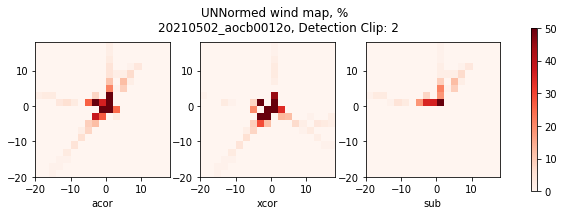

In [97]:
er_pipe.plot_prob_hist(rmin = -20, rmax = 20, rinc = 2).show()

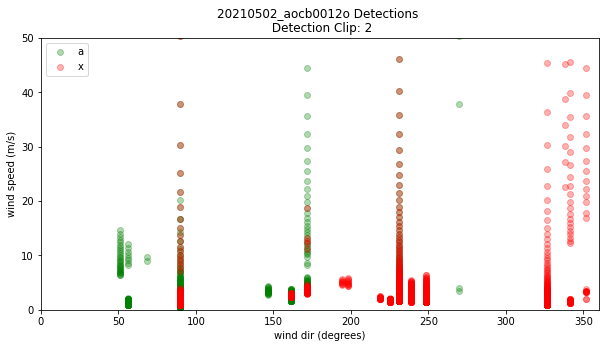

In [91]:
er_pipe.plot_spds_detect().show()

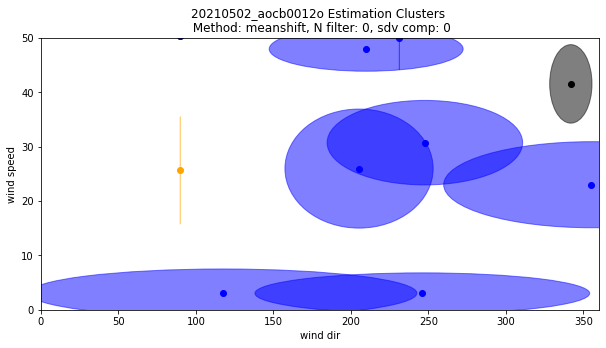

In [92]:
er_pipe.plot_clstr().show()

In [101]:
s = er_pipe.data
s.out_dir = "test/"
s.cor_animate_all(200, avg_sub=True, avg_len=200)

'test/plots/ccor_all_gif/20210502_aocb0012o_stt_ccor_all_4.gif'

'test/plots/ccor_all_gif/20210429_aocb0011o_stt_ccor_all_1.gif'

### B. Checking a night

In [23]:
df_ms = pd.DataFrame()
#method = er.detect_cluster_meanshift

for fts in fits_in[:10]:
    print(fts)
    er_pipe = er.Estimate_simple(fts)
    table = er_pipe.return_table(sdv_cnd = 2, n_filter = 10)
    df_ms = pd.concat([df_ms, table])
df_ms["method"] = "meanshift"

/home/emcewen/out/20210429/fits/20210429_aocb0002o_tmax200_stt.fits
/home/emcewen/out/20210429/fits/20210429_aocb0005o_tmax200_stt.fits
/home/emcewen/out/20210429/fits/20210429_aocb0006o_tmax200_stt.fits
/home/emcewen/out/20210429/fits/20210429_aocb0009o_tmax200_stt.fits
/home/emcewen/out/20210429/fits/20210429_aocb0011o_tmax200_stt.fits
/home/emcewen/out/20210429/fits/20210429_aocb0013o_tmax200_stt.fits
/home/emcewen/out/20210429/fits/20210429_aocb0015o_tmax200_stt.fits
/home/emcewen/out/20210429/fits/20210429_aocb0017o_tmax200_stt.fits
/home/emcewen/out/20210429/fits/20210429_aocb0019o_tmax200_stt.fits
/home/emcewen/out/20210429/fits/20210429_aocb0021o_tmax200_stt.fits


<bound method Figure.show of <Figure size 720x360 with 1 Axes>>

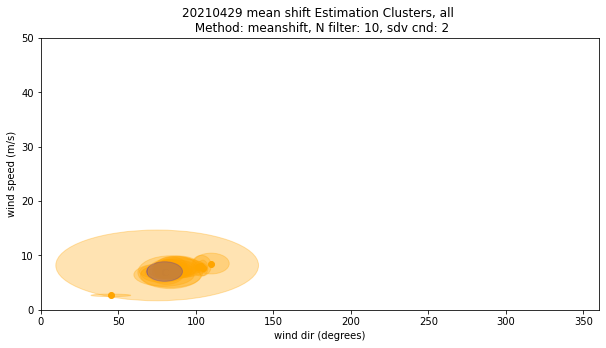

In [173]:
date_name = f"{DATE} mean shift"
er.plot_clstr_table(df_ms[df_ms["dir_std"] < 50 ], min_count=1, name=date_name).show

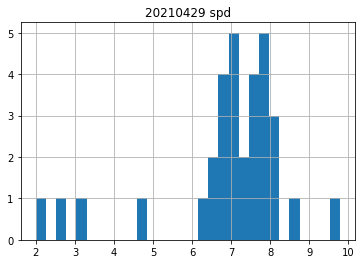

In [176]:
plt.title(f"{DATE} spd")
hist = df_ms["spd"].hist(bins=30)

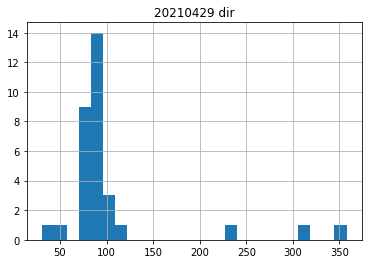

In [177]:
plt.title(f"{DATE} dir")
hist = df_ms["dir"].hist(bins=25)

<function matplotlib.pyplot.show(*args, **kw)>

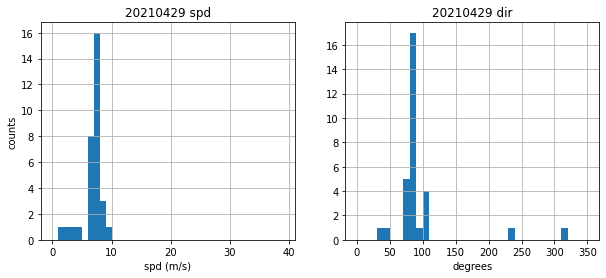

In [194]:
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.hist(df_ms["spd"], bins = range(0, 40))
plt.xlabel("spd (m/s)")
plt.ylabel("counts")
plt.title(f"{DATE} spd")
plt.grid()

plt.subplot(1,2,2)
plt.hist(df_ms["dir"], bins=range(0, 360, 10))
plt.xlabel("degrees")
plt.title(f"{DATE} dir")
plt.grid()
plt.show

In [ ]:
# test animation with overlaid points

## Testing: re-writing active wfs